In [93]:
%matplotlib inline
#%matplotlib widget


In [94]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact


In [114]:
expSumFileName = 'C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\expSumPack_distance.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
bottypes=pd.unique(expSum.bottype)
fronter_times=[]
aligner_times=[]
close_threshold=130
for bottype in bottypes:
    relevant_exp=expSum[(expSum['bottype']==bottype)]
    close_times=[]
    count=0
    count_after_time=0
    fps=25
    for index,row in relevant_exp.iterrows():
        distance_exp=row.DistanceFileNames
        print(distance_exp)
        distance_file=pd.read_csv(distance_exp,index_col=0)
        particels_num=pd.unique(distance_file.particle)
        for particle in particels_num:
            relevant_distance=distance_file[(distance_file['particle']==particle)]
            for index in range(0,len(relevant_distance)):
                row_file=relevant_distance.iloc[index]
                row_file_before=relevant_distance.iloc[index-1]
                if row_file.distance<=close_threshold:
                    if row_file_before.distance>close_threshold:
                        print(index)
                        print("particle:{:.2f}".format(particle))
                    count=count+1
                if row_file.distance>close_threshold:
                    row_file_before=relevant_distance.iloc[index-1]
                    if row_file_before.distance<=close_threshold:
                        time=float(count/fps)
                        close_times.append(time)
                        count=0
                        count_after_time=count_after_time+1
                        print(index)
            if count!=0:
                time=float(count/fps)
                close_times.append(time)
                count=0
                if time==0:
                    print(index)
        print(count_after_time)
        count_after_time=0
    if bottype=='fronter':
        print('saving fronter times')
        fronter_times=close_times
        fronter_csv=pd.Series(fronter_times)
        fronter_csv.to_csv('C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\expSumPack_times_fronter.csv')
    if bottype=='aligner':
        print('saving aligners times')
        aligner_times=close_times
        aligner_csv=pd.Series(aligner_times)
        aligner_csv.to_csv('C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\expSumPack_times_aligner.csv')

D:\Eden\5_1_23\fronters1passive28cm\C0556.MP4_distances.csv
571
574
particle:0.00
581
582
particle:0.00
1359
2983
particle:0.00
3325
3326
particle:0.00
3331
3789
particle:0.00
3993
3997
particle:0.00
3999
4479
particle:0.00
4773
5081
particle:0.00
5082
5083
particle:0.00
5084
5087
particle:0.00
6179
6180
particle:0.00
6186
6503
particle:0.00
6506
6687
particle:0.00
7586
14655
particle:0.00
0
particle:60.00
404
406
particle:60.00
409
2670
particle:60.00
3072
17
D:\Eden\5_1_23\fronters1passive28cm\C0555.MP4_distances.csv
26
27
particle:0.00
111
112
particle:0.00
448
3587
particle:0.00
3593
7774
particle:0.00
13486
13487
particle:0.00
13488
13489
particle:0.00
13493
17314
particle:0.00
20999
21002
particle:0.00


KeyboardInterrupt: 

In [96]:
fronter_path='C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\expSumPack_times_fronter.csv'
fronter_times = pd.read_csv(fronter_path,index_col=0)
fronter_times.columns.values[0] = "fronter_times"
#fronter_times.drop(fronter_times[fronter_times['fronter_times'] ==0].index, inplace = True)
aligners_path='C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\expSumPack_times_aligner.csv'
aligner_times=pd.read_csv(aligners_path,index_col=0)
aligner_times.columns.values[0] = "aligner_times"
#aligner_times.drop(aligner_times[aligner_times['aligner_times'] ==0].index, inplace = True)

In [106]:
experiment=pd.read_csv('D:\\Eden\\5_1_23\\fronters4passive28cm\\C0560.MP4_distances.csv',index_col=0)
relevant_particle=experiment[(experiment['particle']==0)]
print(relevant_particle)
relevant_particle.to_csv('D:\\Eden\\5_1_23\\fronters4passive28cm\\C0560.MP4_distances_test.csv')

       frame.1    distance  particle
frame                               
1            1  125.936492       0.0
2            2  125.936492       0.0
3            3  125.936492       0.0
4            4  123.967738       0.0
5            5  124.951991       0.0
...        ...         ...       ...
33764    33764  622.602602       0.0
33765    33765  621.930060       0.0
33766    33766  620.627102       0.0
33767    33767  618.968497       0.0
33768    33768  618.142378       0.0

[33590 rows x 3 columns]


In [105]:
relevant_particle

,frame.1,distance,particle
frame,,,
1,1,125.936492,0.0
2,2,125.936492,0.0
3,3,125.936492,0.0
4,4,123.967738,0.0
5,5,124.951991,0.0
...,...,...,...
33764,33764,622.602602,0.0
33765,33765,621.930060,0.0
33766,33766,620.627102,0.0


In [99]:
np.argwhere(fronter_times.columns.values[1]==0)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [89]:
log_fronter_times=np.log(fronter_times)
print(np.min(log_fronter_times))

fronter_times   -3.218876
dtype: float64


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:69: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  def _wrapreduction(obj, ufunc, method, axis, dtype, out, **kwargs):


In [90]:
log_aligner_times=np.log(aligner_times)
print(np.max(log_aligner_times))

aligner_times    7.10319
dtype: float64


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:69: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  def _wrapreduction(obj, ufunc, method, axis, dtype, out, **kwargs):


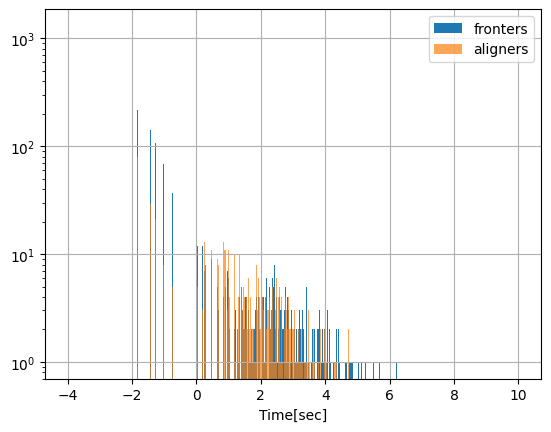

In [92]:
bin_num=1500
#bin_range=(np.array(fronter_times).min(),np.array(fronter_times).max())
#bin_range=(np.array(fronter_times).min(),100)
log_plt=True
#plt.xscale('log')
log_fronter_times=np.log(fronter_times)
log_aligner_times=np.log(aligner_times)
plt.hist(log_fronter_times,range=[-4,10],bins=bin_num,log=log_plt,label='fronters')
plt.hist(log_aligner_times,range=[-4,10],bins=bin_num,alpha=0.7,log=log_plt,label='aligners')
plt.legend(loc='upper right')
plt.xlabel('Time[sec]')
plt.grid()
plt.show()

In [71]:
#print(log_fronter_times)
#print(np.min(fronter_times))
print(np.where(fronter_times==0.0))
result=np.where(fronter_times==0.0)
print(result)

(array([], dtype=int64),)
(array([], dtype=int64),)


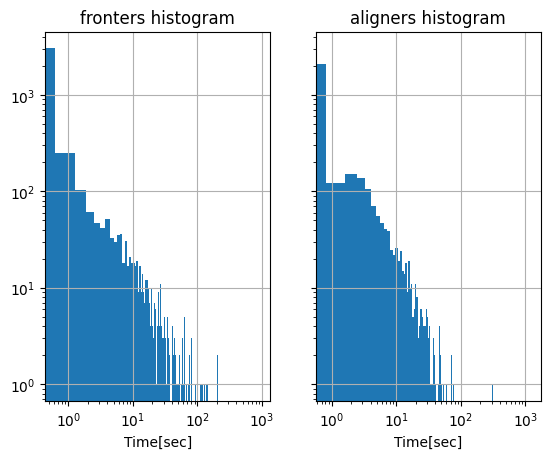

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.hist(fronter_times,bins=bin_num,log=log_plt,label='fronters')
ax1.set_title('fronters histogram')
ax2.hist(aligner_times,bins=bin_num,log=log_plt,label='aligners')
ax2.set_title('aligners histogram')
ax1.grid()
ax2.grid()
ax1.set_xlabel('Time[sec]')
ax2.set_xlabel('Time[sec]')
plt.show()

In [13]:
len(fronter_times)

4274

In [14]:
len(aligner_times)

3226

In [ ]:
range=(np.array(fronter_times).min(),40